<a href="https://colab.research.google.com/github/matheusfigueiredoo/detection-of-cyber-attacks/blob/main/legitimate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gradient Boost

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv("drive/MyDrive/MQTTset/train70_augmented.csv", nrows=1000000)
test = pd.read_csv("drive/MyDrive/MQTTset/test30_augmented.csv", nrows=200000)

In [ ]:
train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [ ]:
# distribuição das targets

print("Train: \n", train['target'].value_counts(), "\n")
print("Test: \n", test['target'].value_counts())

Train: 
 target
legitimate    499989
bruteforce    100197
slowite       100188
malformed     100067
dos            99869
flood          99690
Name: count, dtype: int64 

Test: 
 target
legitimate    100109
flood          20060
bruteforce     20055
malformed      20037
slowite        19886
dos            19853
Name: count, dtype: int64


In [ ]:
# divisão de nomes das targets para legitimate e malicious

for i in train.index:
    if train['target'][i] != 'legitimate':
        train.at[i, 'target'] = 'malicious'

for i in test.index:
    if test['target'][i] != 'legitimate':
        test.at[i, 'target'] = 'malicious'

In [ ]:
# nova distribuição das targets

print("Train: \n", train['target'].value_counts(), "\n")
print("Test: \n", test['target'].value_counts())

Train: 
 target
malicious     500011
legitimate    499989
Name: count, dtype: int64 

Test: 
 target
legitimate    100109
malicious      99891
Name: count, dtype: int64


In [ ]:
# três primeiras linhas

print(train['target'][:3], "\n")
print(test['target'][:3])

0    legitimate
1     malicious
2     malicious
Name: target, dtype: object 

0     malicious
1    legitimate
2     malicious
Name: target, dtype: object


In [ ]:
# pre processamento de dados
# separacao de features e targets

X_train = train.iloc[:,:-1]
y_train = train['target']

X_test = test.iloc[:,:-1]
y_test = test['target']

print(X_train.shape)
print(X_test.shape)

(1000000, 33)
(200000, 33)


In [ ]:
# transformacao de targets categoricas em numeros inteiros

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [ ]:
label.fit(y_train)
label.fit(y_test)

LabelEncoder()

In [ ]:
list(label.classes_)

['legitimate', 'malicious']

In [ ]:
y_train = label.transform(y_train)
y_test = label.transform(y_test)

In [ ]:
print(y_train)
print(y_test)

[0 1 1 ... 1 1 0]
[1 0 1 ... 1 0 0]


In [ ]:
# ajuste de dados

# 'columns' sao as features com valores irrelevantes para o treinamento

columns = ['mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp', 'mqtt.conflag.qos',
           'mqtt.conflag.reserved', 'mqtt.conflag.retain', 'mqtt.conflag.willflag',
           'mqtt.retain', 'mqtt.sub.qos', 'mqtt.suback.qos', 'mqtt.willmsg', 'mqtt.willmsg_len',
           'mqtt.willtopic', 'mqtt.willtopic_len', 'mqtt.msg']

# features = features.drop(columns, axis=1)

X_train = X_train.drop(columns, axis=1)
X_test = X_test.drop(columns, axis=1)


print(X_train.shape)
print(X_test.shape)

(1000000, 19)
(200000, 19)


In [ ]:
# ajuste de variáveis categóricas

# features = pd.get_dummies(features)

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

print(X_train.shape)
print(X_test.shape)

(1000000, 44)
(200000, 44)


In [ ]:
# 'col' sao as features categoricas com valores True/False

col = ['tcp.flags_0x00000002',
       'tcp.flags_0x00000004', 'tcp.flags_0x00000010', 'tcp.flags_0x00000011',
       'tcp.flags_0x00000012', 'tcp.flags_0x00000014', 'tcp.flags_0x00000018',
       'tcp.flags_0x00000019', 'mqtt.conack.flags_0',
       'mqtt.conack.flags_0x00000000', 'mqtt.hdrflags_0',
       'mqtt.hdrflags_0x00000010', 'mqtt.hdrflags_0x00000020',
       'mqtt.hdrflags_0x00000030', 'mqtt.hdrflags_0x00000031',
       'mqtt.hdrflags_0x00000032', 'mqtt.hdrflags_0x0000003a',
       'mqtt.hdrflags_0x00000040', 'mqtt.hdrflags_0x00000050',
       'mqtt.hdrflags_0x00000082', 'mqtt.hdrflags_0x00000090',
       'mqtt.hdrflags_0x000000c0', 'mqtt.hdrflags_0x000000d0',
       'mqtt.hdrflags_0x000000e0', 'mqtt.protoname_0', 'mqtt.protoname_MQTT']

In [ ]:
# substituicao dos valores True/False por 1/0 respectivamente

# features[col] = features[col].replace({True: 1, False: 0})

X_train[col] = X_train[col].replace({1: True, 0: False})
X_test[col] = X_test[col].replace({1: True, 0: False})

In [ ]:
# features = features.values

X_train = X_train.values
X_test = X_test.values

print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# Gradient Boost

from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
clf = GradientBoostingClassifier(n_estimators=20)

In [ ]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=20)

In [ ]:
# predição de valores

predict = clf.predict(X_test)

In [ ]:
print("Accuracy train: {}".format(clf.score(X_train, y_train)))
print("Accuracy test: {}".format(clf.score(X_test, y_test)))

Accuracy train: 0.937364
Accuracy test: 0.936985


In [ ]:
# metrics

from sklearn.metrics import classification_report

print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94    100109
           1       0.96      0.92      0.94     99891

    accuracy                           0.94    200000
   macro avg       0.94      0.94      0.94    200000
weighted avg       0.94      0.94      0.94    200000



In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, predict)
print(matrix)

[[95873  4236]
 [ 8367 91524]]


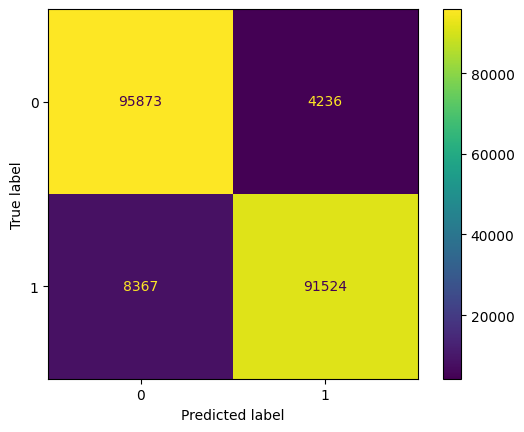

In [ ]:
# display matrix

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline

cm = confusion_matrix(y_test, predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()
plt.show()